In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# each image in the MNIST dataset is represented as a 28x28x1 image

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))   # reshape the training and testing data from 28x28 matrices
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))  # to 1D arrays of length 784, preparing the data for input to the neural network.

#perform data normalization on Lines 31 and 32 by scaling the pixel intensities to the range [0, 1].
# scale data to the range of [0, 1]

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
#normalize the pixel values of the images to the range [0, 1] by dividing them by 255.0.

[INFO] accessing MNIST...


In [ ]:
lb = LabelBinarizer() #used to convert the categorical labels (numbers 0 to 9) into one-hot encoded binary vectors.
trainY = lb.fit_transform(trainY) #transform the training and testing labels into one-hot encoded
testY = lb.transform(testY)  #binary vectors using the LabelBinarizer instance

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu")) #adds a dense layer with 256 units, specifying the input shape of the data as (784,) and using the ReLU activation function.
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax")) #used on output layer to turn output into probability like values suitable for multi-class classification.

print("[INFO] training network...")
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=["accuracy"]) #using accuracy as the evaluation metric.
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=128)
#trains the model using the training data (trainX and trainY) for 10 epochs with a batch size of 128. The validation data (testX, testY) is used to monitor the model's performance during training.

[INFO] training network...
Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 1.2433 - accuracy: 0.6792 - val_loss: 0.5347 - val_accuracy: 0.8655
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4432 - accuracy: 0.8800 - val_loss: 0.3571 - val_accuracy: 0.9005
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3449 - accuracy: 0.9017 - val_loss: 0.3048 - val_accuracy: 0.9137
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3016 - accuracy: 0.9131 - val_loss: 0.2728 - val_accuracy: 0.9231
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2719 - accuracy: 0.9215 - val_loss: 0.2483 - val_accuracy: 0.9277
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2496 - accuracy: 0.9286 - val_loss: 0.2332 - val_accuracy: 0.9326
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2304 - accuracy: 0.9335 - val_loss: 0.2195 - 

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128) #uses the trained model to make predictions on the test data (testX) with a batch size of 128.
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))
#prints a classification report comparing the true labels (testY) with the predicted labels (predictions), providing metrics like precision,
#recall, and F1-score for each class.

[INFO] evaluating network...
79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.96      0.90      0.93       892
           6       0.94      0.96      0.95       958
           7       0.97      0.94      0.95      1028
           8       0.91      0.94      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



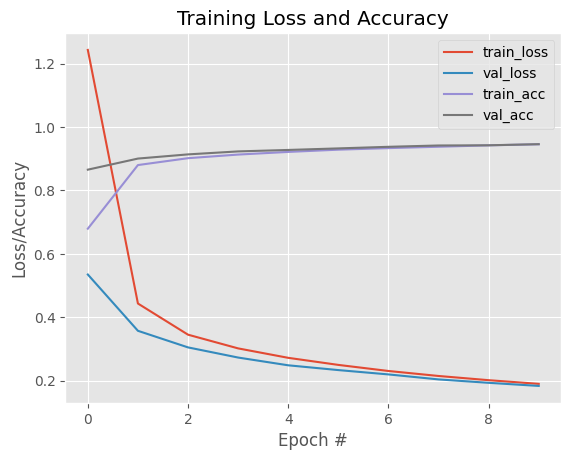

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
